In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('featuresAndLabels.csv')

In [56]:
df.head()

,clipName,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,tonnets_172,N,A,D,F,S,H,low,medium,high
0,1022_ITS_ANG_XX,-625.058655,-4.994524,-5.040599,31.118151,-11.813456,-14.570557,0.724647,-9.413414,-3.972650,...,0.009466,0.000000,0.454545,0.545455,0.0,0.0,0.0,0.000000,0.272727,0.727273
1,1037_ITS_ANG_XX,-648.157227,-10.045857,7.429339,20.802429,-12.531164,-11.790744,-3.735406,-6.268928,-9.658600,...,0.032486,0.500000,0.200000,0.200000,0.1,0.0,0.0,0.000000,0.300000,0.700000
2,1060_ITS_NEU_XX,-565.523743,-29.746906,5.289134,20.724148,-6.095077,-11.757398,0.216888,-9.311358,-4.887557,...,0.003219,0.900000,0.000000,0.000000,0.0,0.1,0.0,0.000000,0.200000,0.800000
3,1075_ITS_NEU_XX,-556.091248,-15.240954,11.779830,20.665905,-9.193678,-11.914318,0.438259,-7.635978,-7.933719,...,0.001605,0.909091,0.000000,0.090909,0.0,0.0,0.0,0.181818,0.090909,0.727273
4,1073_IOM_DIS_XX,-622.589111,-13.248747,4.246189,30.263844,-10.529772,-10.335563,1.289759,-11.116067,-5.185853,...,0.040066,0.300000,0.000000,0.600000,0.0,0.1,0.0,0.200000,0.200000,0.600000


In [57]:
import torch

def getEmotionLabel(row):
    target = row[-9:-3]
    target = torch.tensor(target)
    label = torch.argmax(target)
    label = label.item()
    return label

def getStrengthLabel(row):
    target = row[-4:-1]
    target = torch.tensor(target)
    label = torch.argmax(target)
    label = label.item()
    return label

df['emotionLabel'] = df.apply(getEmotionLabel, axis=1)
df['strengthLabel'] = df.apply(getStrengthLabel, axis=1)


/var/folders/3y/2jj6w99n11g766vg19kpr73h0000gn/T/ipykernel_55332/2158377136.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = torch.tensor(target)
/var/folders/3y/2jj6w99n11g766vg19kpr73h0000gn/T/ipykernel_55332/2158377136.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = torch.tensor(target)


In [58]:
df.head()

,clipName,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,A,D,F,S,H,low,medium,high,emotionLabel,strengthLabel
0,1022_ITS_ANG_XX,-625.058655,-4.994524,-5.040599,31.118151,-11.813456,-14.570557,0.724647,-9.413414,-3.972650,...,0.454545,0.545455,0.0,0.0,0.0,0.000000,0.272727,0.727273,2,2
1,1037_ITS_ANG_XX,-648.157227,-10.045857,7.429339,20.802429,-12.531164,-11.790744,-3.735406,-6.268928,-9.658600,...,0.200000,0.200000,0.1,0.0,0.0,0.000000,0.300000,0.700000,0,2
2,1060_ITS_NEU_XX,-565.523743,-29.746906,5.289134,20.724148,-6.095077,-11.757398,0.216888,-9.311358,-4.887557,...,0.000000,0.000000,0.0,0.1,0.0,0.000000,0.200000,0.800000,0,2
3,1075_ITS_NEU_XX,-556.091248,-15.240954,11.779830,20.665905,-9.193678,-11.914318,0.438259,-7.635978,-7.933719,...,0.000000,0.090909,0.0,0.0,0.0,0.181818,0.090909,0.727273,0,2
4,1073_IOM_DIS_XX,-622.589111,-13.248747,4.246189,30.263844,-10.529772,-10.335563,1.289759,-11.116067,-5.185853,...,0.000000,0.600000,0.0,0.1,0.0,0.200000,0.200000,0.600000,2,2


In [59]:
# Assuming df is your DataFrame
mfcc = df.iloc[:, 1:21]
labels = df.iloc[:, -2:]

# Combine them (avoids duplicates if there's overlap)
df_mfcc = pd.concat([mfcc, labels], axis=1)


In [60]:
df_mfcc.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,emotionLabel,strengthLabel
0,-625.058655,-4.994524,-5.040599,31.118151,-11.813456,-14.570557,0.724647,-9.413414,-3.972650,-4.298231,...,-5.602336,4.456144,-8.143406,-9.486339,-5.455838,-11.435941,-12.193826,-5.612930,2,2
1,-648.157227,-10.045857,7.429339,20.802429,-12.531164,-11.790744,-3.735406,-6.268928,-9.658600,-0.535167,...,-4.172614,0.519998,-6.421024,-8.749070,-8.595124,-10.371782,-12.373834,-9.607895,0,2
2,-565.523743,-29.746906,5.289134,20.724148,-6.095077,-11.757398,0.216888,-9.311358,-4.887557,-3.936382,...,-5.081137,1.055304,-6.388585,-10.054364,-11.444974,-11.552482,-14.028445,-11.087169,0,2
3,-556.091248,-15.240954,11.779830,20.665905,-9.193678,-11.914318,0.438259,-7.635978,-7.933719,-4.727487,...,-4.169020,-0.530323,-6.106951,-11.193390,-9.741144,-10.055187,-13.615794,-10.678548,0,2
4,-622.589111,-13.248747,4.246189,30.263844,-10.529772,-10.335563,1.289759,-11.116067,-5.185853,-4.966252,...,-5.156835,0.940254,-6.040308,-11.486335,-8.834122,-12.224545,-13.968648,-10.741427,2,2


Text(0, 0.5, 'Value')

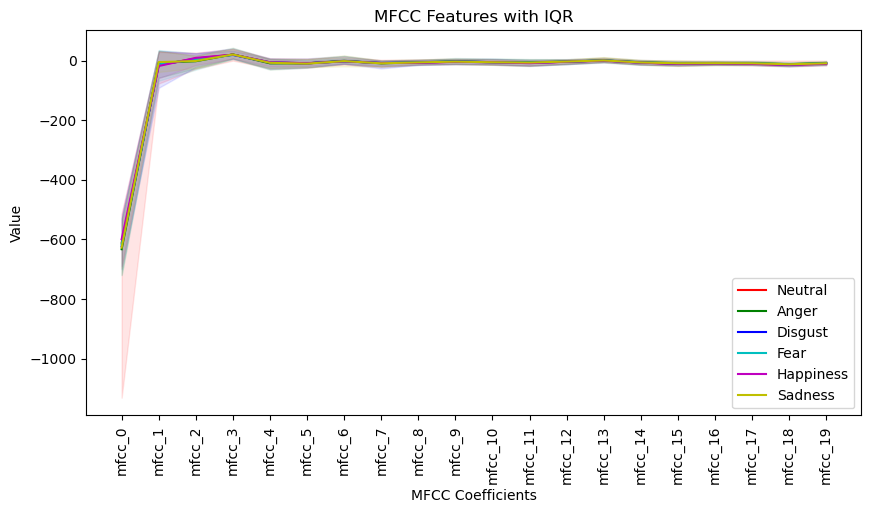

In [70]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
colors = ['r', 'g', 'b', 'c', 'm', 'y']
emotionLabel = ['Neutral','Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness']

for i in range(6):
    df_sub = df_mfcc[df_mfcc['emotionLabel'] == i]
    df_sub_mean = df_sub.iloc[:, :-2].mean(axis=0)
    df_sub_max = df_sub.iloc[:, :-2].max(axis=0)
    df_sub_min= df_sub.iloc[:, :-2].min(axis=0)
    plt.plot(df_sub_mean,color=colors[i], label=emotionLabel[i])
    plt.fill_between(range(20), df_sub_max, df_sub_min, color=colors[i], alpha=0.1)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.title('MFCC Features with IQR')
plt.legend()
plt.xlabel('MFCC Coefficients')
plt.ylabel('Value')
    
